##### Copyright 2020 The TensorFlow Authors.

In [1]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# TensorFlow 기본 사항

<table class="tfo-notebook-buttons" align="left">
  <td>     <a target="_blank" href="https://www.tensorflow.org/guide/basics"><img src="https://www.tensorflow.org/images/tf_logo_32px.png">TensorFlow.org에서 보기</a>
</td>
  <td>     <a target="_blank" href="https://colab.research.google.com/github/tensorflow/docs-l10n/blob/master/site/ko/guide/basics.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png">Google Colab에서 실행하기</a>
</td>
  <td><a target="_blank" href="https://github.com/tensorflow/docs-l10n/blob/master/site/ko/guide/basics.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png">GitHub에서 소스 보기</a></td>
  <td>     <a href="https://storage.googleapis.com/tensorflow_docs/docs-l10n/site/ko/guide/basics.ipynb"><img src="https://www.tensorflow.org/images/download_logo_32px.png">노트북 다운로드하기</a>   </td>
</table>

이 가이드에서는 *TensorFlow 기본 사항*에 대한 간략한 개요를 제공합니다. 이 문서의 각 섹션은 더 큰 주제의 개요입니다. 각 섹션의 끝에서 전체 가이드에 대한 링크를 확인할 수 있습니다.

TensorFlow는 머신러닝 위한 엔드 투 엔드 플랫폼입니다. TensorFlow는 다음을 지원합니다.

- 다차원 배열 기반 숫자 계산(<a href="https://numpy.org/" class="external">NumPy</a>과 유사)
- GPU 및 분산 처리
- 자동 미분
- 모델 구성, 훈련 및 내보내기
- 그 외

## 텐서

TensorFlow는 `tf.Tensor` 객체로 표현되는 다차원 배열 또는 *텐서*에서 작동합니다. 다음은 2차원 텐서입니다.

In [2]:
import tensorflow as tf

x = tf.constant([[1., 2., 3.],
                 [4., 5., 6.]])

print(x)
print(x.shape)
print(x.dtype)

2022-12-14 21:48:52.378691: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2022-12-14 21:48:52.378780: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory
2022-12-14 21:48:52.378789: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nvidia GPU with TensorRT, please make sure the missing libraries mentioned above are installed properly.


tf.Tensor(
[[1. 2. 3.]
 [4. 5. 6.]], shape=(2, 3), dtype=float32)
(2, 3)
<dtype: 'float32'>


`tf.Tensor`의 가장 중요한 속성은 `shape`와 `dtype`입니다.

- `Tensor.shape`: 각 축을 따라 텐서의 크기를 알려줍니다.
- `Tensor.dtype`: 텐서에 있는 모든 요소의 유형을 알려줍니다.

TensorFlow는 텐서에 대한 표준 수학 연산과 머신러닝에 특화된 많은 연산을 구현합니다.

예제:

In [3]:
x + x

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[ 2.,  4.,  6.],
       [ 8., 10., 12.]], dtype=float32)>

In [4]:
5 * x

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[ 5., 10., 15.],
       [20., 25., 30.]], dtype=float32)>

In [5]:
x @ tf.transpose(x)

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[14., 32.],
       [32., 77.]], dtype=float32)>

In [6]:
tf.concat([x, x, x], axis=0)

<tf.Tensor: shape=(6, 3), dtype=float32, numpy=
array([[1., 2., 3.],
       [4., 5., 6.],
       [1., 2., 3.],
       [4., 5., 6.],
       [1., 2., 3.],
       [4., 5., 6.]], dtype=float32)>

In [7]:
tf.nn.softmax(x, axis=-1)

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[0.09003057, 0.24472848, 0.6652409 ],
       [0.09003057, 0.24472848, 0.6652409 ]], dtype=float32)>

In [8]:
tf.reduce_sum(x)

<tf.Tensor: shape=(), dtype=float32, numpy=21.0>

참고: 일반적으로 TensorFlow 함수가 `Tensor`를 입력으로 받을 것을 예상하는 경우 이 함수는 `tf.convert_to_tensor`를 사용하여 `Tensor`로 변환할 수 있는 모든 항목을 허용하게 됩니다.

In [9]:
tf.convert_to_tensor([1,2,3])

<tf.Tensor: shape=(3,), dtype=int32, numpy=array([1, 2, 3], dtype=int32)>

In [10]:
tf.reduce_sum([1,2,3])

<tf.Tensor: shape=(), dtype=int32, numpy=6>

CPU에서 대규모 계산을 실행하면 속도가 느려질 수 있습니다. 적절하게 구성된 TensorFlow는 GPU와 같은 가속기 하드웨어를 사용하여 작업을 매우 빠르게 실행할 수 있습니다.

In [11]:
if tf.config.list_physical_devices('GPU'):
  print("TensorFlow **IS** using the GPU")
else:
  print("TensorFlow **IS NOT** using the GPU")

TensorFlow **IS** using the GPU


자세한 내용은 [텐서 가이드](tensor.ipynb)를 참고하세요.

## 변수

일반 `tf.Tensor` 객체는 변경할 수 없습니다. TensorFlow에 모델 가중치(또는 기타 변경 가능한 상태)를 저장하려면 `tf.Variable`을 사용하세요.

In [12]:
var = tf.Variable([0.0, 0.0, 0.0])

In [13]:
var.assign([1, 2, 3])

<tf.Variable 'UnreadVariable' shape=(3,) dtype=float32, numpy=array([1., 2., 3.], dtype=float32)>

In [14]:
var.assign_add([1, 1, 1])

<tf.Variable 'UnreadVariable' shape=(3,) dtype=float32, numpy=array([2., 3., 4.], dtype=float32)>

자세한 내용은 [변수 가이드](variable.ipynb)를 참고하세요.

## 자동 미분

<a href="https://en.wikipedia.org/wiki/Gradient_descent" class="external"><em>경사 하강</em></a> 및 관련 알고리즘은 최신 머신러닝의 초석입니다.

이를 사용하기 위해 TensorFlow는 미분을 사용하여 그래디언트를 계산하는 자동 미분(autodiff)을 구현합니다. 일반적으로 이를 사용하여 가중치에 대한 모델의 *오류* 또는 *손실* 그래디언트를 계산합니다.

In [15]:
x = tf.Variable(1.0)

def f(x):
  y = x**2 + 2*x - 5
  return y

In [16]:
f(x)

<tf.Tensor: shape=(), dtype=float32, numpy=-2.0>

`x = 1.0`, `y = f(x) = (1**2 + 2*1 - 5) = -2` 입니다.

`y`의 도함수는 `y' = f'(x) = (2*x + 2) = 4`입니다. TensorFlow는 이를 다음과 같이 자동으로 계산할 수 있습니다.

In [17]:
with tf.GradientTape() as tape:
  y = f(x)

g_x = tape.gradient(y, x)  # g(x) = dy/dx

g_x

<tf.Tensor: shape=(), dtype=float32, numpy=4.0>

이 간소화된 예제에서는 단일 스칼라(`x`)에 대한 도함수만 사용하지만 TensorFlow는 스칼라가 아닌 텐서의 개수에 관계없이 동시에 그래디언트를 계산할 수 있습니다.

자세한 내용은 [Autodiff 가이드](autodiff.ipynb)를 참고하세요.

## 그래프와 tf.function

다른 Python 라이브러리처럼 TensorFlow를 대화형으로 사용할 수도 있으며, 또한 TensorFlow는 다음을 위한 도구도 제공합니다.

- **성능 최적화**: 학습 및 추론 속도를 높입니다.
- **내보내기**: 학습을 완료한 후 모델을 저장할 수 있습니다.

이를 위해서는 `tf.function`을 사용하여 Python으로부터 순수 TensorFlow 코드를 분리해야 합니다.

In [18]:
@tf.function
def my_func(x):
  print('Tracing.\n')
  return tf.reduce_sum(x)

`tf.function`을 처음 실행하면 Python에서 실행되지만 함수 내에서 수행된 TensorFlow 계산을 나타내는 완전하고 최적화된 그래프를 캡처합니다.

In [19]:
x = tf.constant([1, 2, 3])
my_func(x)

Tracing.



<tf.Tensor: shape=(), dtype=int32, numpy=6>

후속 호출에서 TensorFlow는 최적화된 그래프만 실행하고 TensorFlow가 아닌 단계는 건너뜁니다. 아래에서 `print`는 TensorFlow 함수가 아니라 Python 함수이므로 `my_func`는 *tracing*을 출력하지 않습니다.

In [20]:
x = tf.constant([10, 9, 8])
my_func(x)

<tf.Tensor: shape=(), dtype=int32, numpy=27>

다른 *서명*(`shape` 및 `dtype`)이 있는 입력에는 그래프를 재사용할 수 없으므로 대신 다음과 같이 새 그래프가 생성됩니다.

In [21]:
x = tf.constant([10.0, 9.1, 8.2], dtype=tf.float32)
my_func(x)

Tracing.



<tf.Tensor: shape=(), dtype=float32, numpy=27.3>

이렇게 캡처된 그래프는 두 가지 이점을 제공합니다.

- 많은 경우 실행 속도를 크게 향상시킵니다(이 예제에서는 아님).
- `tf.saved_model`을 사용하여 이 그래프를 내보내면 Python을 설치하지 않아도 [서버](https://www.tensorflow.org/tfx/serving/docker) 또는 [모바일 장치](https://www.tensorflow.org/lite/guide)와 같은 다른 시스템에서 실행할 수 있습니다.

자세한 내용은 [그래프 소개](intro_to_graphs.ipynb)를 참고하세요.

## 모듈, 레이어 및 모델

`tf.Module`은 `tf.Variable` 객체와 이 객체에서 작동하는 `tf.function` 객체를 관리하기 위한 클래스입니다. `tf.Module` 클래스는 다음 두 가지 중요한 기능을 지원하는 데 필요합니다.

1. `tf.train.Checkpoint`를 사용하여 변수 값을 저장하고 복원할 수 있습니다. 이렇게 하면 모델의 상태를 빠르게 저장하고 복원할 수 있으므로 훈련을 진행할 때 유용합니다.
2. `tf.saved_model`을 사용하여 `tf.Variable` 값과 `tf.function` 그래프  *모두*를 가져오고 내보낼 수 있습니다. 이를 통해 모델을 만든 Python 프로그램이 없이 독립적으로 모델을 실행할 수 있습니다.

다음은 간단한 `tf.Module` 개체를 내보내는 전체 예제입니다.

In [22]:
class MyModule(tf.Module):
  def __init__(self, value):
    self.weight = tf.Variable(value)

  @tf.function
  def multiply(self, x):
    return x * self.weight

In [23]:
mod = MyModule(3)
mod.multiply(tf.constant([1, 2, 3]))

<tf.Tensor: shape=(3,), dtype=int32, numpy=array([3, 6, 9], dtype=int32)>

`Module`을 저장합니다.

In [24]:
save_path = './saved'
tf.saved_model.save(mod, save_path)

INFO:tensorflow:Assets written to: ./saved/assets


결과로 생성된 SavedModel은 생성한 코드와 무관합니다. Python, 기타 언어 바인딩 또는 [TensorFlow 서빙](https://www.tensorflow.org/tfx/serving/docker)에서 SavedModel을 로드할 수 있습니다. 또한 SavedModel이 [TensorFlow Lite](https://www.tensorflow.org/lite/guide) 또는 [TensorFlow JS](https://www.tensorflow.org/js/guide)와 함께 실행되도록 변환할 수도 있습니다.

In [25]:
reloaded = tf.saved_model.load(save_path)
reloaded.multiply(tf.constant([1, 2, 3]))

<tf.Tensor: shape=(3,), dtype=int32, numpy=array([3, 6, 9], dtype=int32)>

`tf.keras.layers.Layer` 및 `tf.keras.Model` 클래스는 `tf.Module`을 기반으로 빌드하며 모델 구축, 훈련 및 저장을 위한 추가 기능 및 편리한 방법을 제공합니다. 이러한 방법 중 일부는 다음 섹션에서 설명합니다.

자세한 내용은 [모듈 소개](intro_to_modules.ipynb)를 참고하세요.

## 훈련 루프

이제 이 모든 기능을 결합하여 기본 모델을 빌드하고 처음부터 훈련을 진행해 봅니다.

먼저 몇 가지 예제 데이터를 만듭니다. 다음 예제는 이차 곡선을 느슨하게 따르는 점 구름을 생성합니다.

In [26]:
import matplotlib
from matplotlib import pyplot as plt

matplotlib.rcParams['figure.figsize'] = [9, 6]

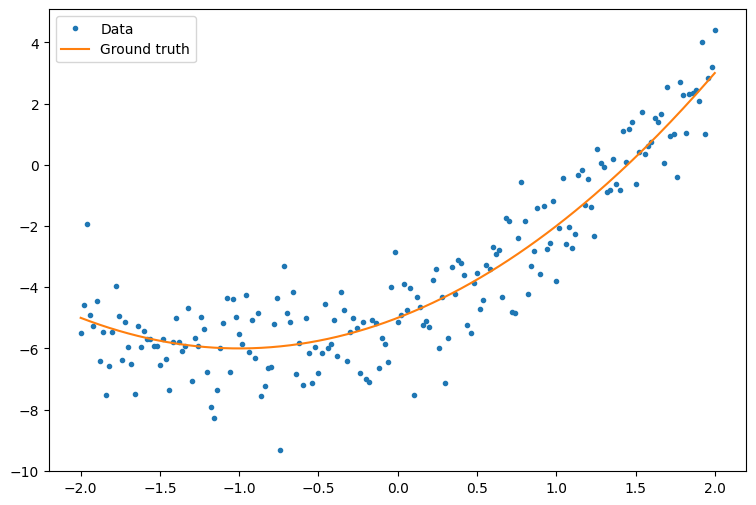

In [27]:
x = tf.linspace(-2, 2, 201)
x = tf.cast(x, tf.float32)

def f(x):
  y = x**2 + 2*x - 5
  return y

y = f(x) + tf.random.normal(shape=[201])

plt.plot(x.numpy(), y.numpy(), '.', label='Data')
plt.plot(x, f(x), label='Ground truth')
plt.legend();

무작위로 초기화된 가중치와 편향을 사용하여 이차 모델을 생성합니다.

In [28]:
class Model(tf.Module):

  def __init__(self):
    # Randomly generate weight and bias terms
    rand_init = tf.random.uniform(shape=[3], minval=0., maxval=5., seed=22)
    # Initialize model parameters
    self.w_q = tf.Variable(rand_init[0])
    self.w_l = tf.Variable(rand_init[1])
    self.b = tf.Variable(rand_init[2])
  
  @tf.function
  def __call__(self, x):
    # Quadratic Model : quadratic_weight * x^2 + linear_weight * x + bias
    return self.w_q * (x**2) + self.w_l * x + self.b

먼저, 훈련을 진행하기 전에 모델의 성능을 관찰합니다.

In [29]:
quad_model = Model()

In [30]:
def plot_preds(x, y, f, model, title):
  plt.figure()
  plt.plot(x, y, '.', label='Data')
  plt.plot(x, f(x), label='Ground truth')
  plt.plot(x, model(x), label='Predictions')
  plt.title(title)
  plt.legend()

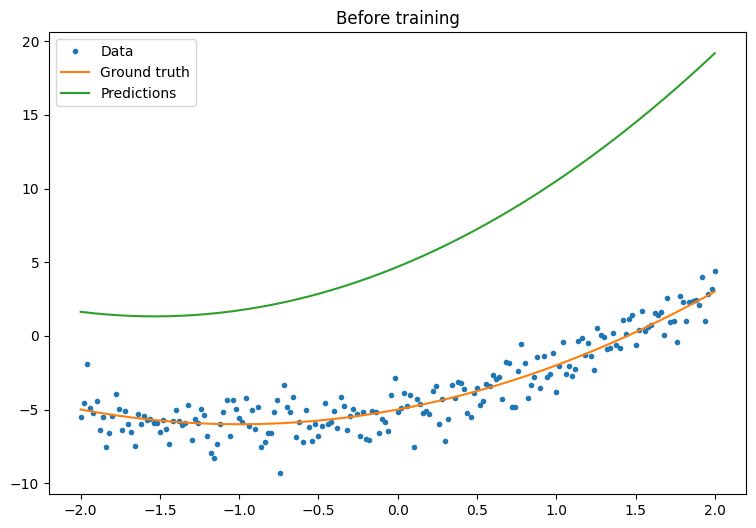

In [31]:
plot_preds(x, y, f, quad_model, 'Before training')

이제 모델의 손실을 정의합니다.

이 모델이 연속 값을 예측하기 위한 것임을 감안할 때 평균 제곱 오차(MSE)는 손실 함수에 대응하기 위한 좋은 선택이 됩니다. 예측 벡터 $\hat{y}$와 실제 목표 벡터 $y$가 제공되면 MSE는 예측 값과 실측 정보의 차이 값의 제곱의 평균으로 정의됩니다.

$MSE = \frac{1}{m}\sum_{i=1}^{m}(\hat{y}_i -y_i)^2$

In [32]:
def mse_loss(y_pred, y):
  return tf.reduce_mean(tf.square(y_pred - y))

모델에 대한 기본 훈련 루프를 작성합니다. 루프는 모델의 매개변수를 반복적으로 업데이트하기 위해 입력에 대한 MSE 손실 함수 및 그래디언트를 사용합니다. 훈련에 미니 배치를 사용하면 메모리 효율성과 더 빠른 수렴이 모두 제공됩니다. `tf.data.Dataset` API에는 일괄 처리 및 셔플링에 유용한 함수가 있습니다.

In [33]:
batch_size = 32
dataset = tf.data.Dataset.from_tensor_slices((x, y))
dataset = dataset.shuffle(buffer_size=x.shape[0]).batch(batch_size)

Mean squared error for step 0: 57.032


Mean squared error for step 10: 10.153


Mean squared error for step 20: 4.238


Mean squared error for step 30: 2.218


Mean squared error for step 40: 1.496


Mean squared error for step 50: 1.238


Mean squared error for step 60: 1.149


Mean squared error for step 70: 1.121


Mean squared error for step 80: 1.109


Mean squared error for step 90: 1.107


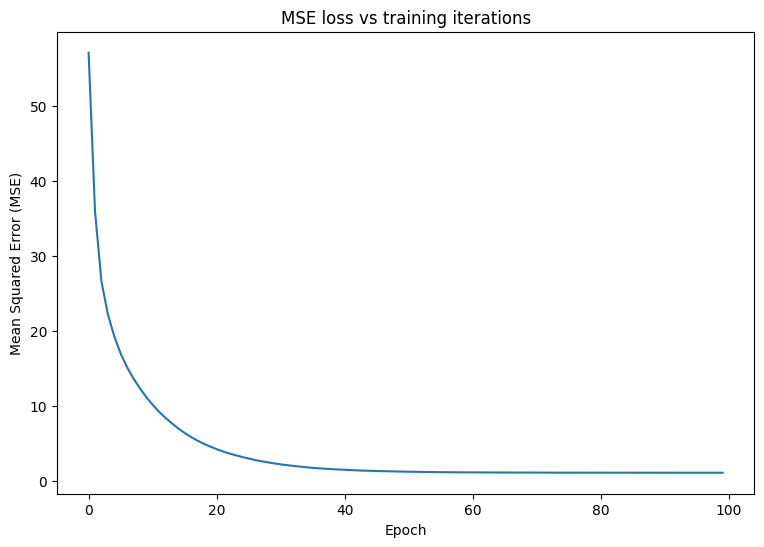

In [34]:
# Set training parameters
epochs = 100
learning_rate = 0.01
losses = []

# Format training loop
for epoch in range(epochs):
  for x_batch, y_batch in dataset:
    with tf.GradientTape() as tape:
      batch_loss = mse_loss(quad_model(x_batch), y_batch)
    # Update parameters with respect to the gradient calculations
    grads = tape.gradient(batch_loss, quad_model.variables)
    for g,v in zip(grads, quad_model.variables):
        v.assign_sub(learning_rate*g)
  # Keep track of model loss per epoch
  loss = mse_loss(quad_model(x), y)
  losses.append(loss)
  if epoch % 10 == 0:
    print(f'Mean squared error for step {epoch}: {loss.numpy():0.3f}')

# Plot model results
print("\n")
plt.plot(range(epochs), losses)
plt.xlabel("Epoch")
plt.ylabel("Mean Squared Error (MSE)")
plt.title('MSE loss vs training iterations');

이제 훈련 후 모델의 성능을 관찰합니다.

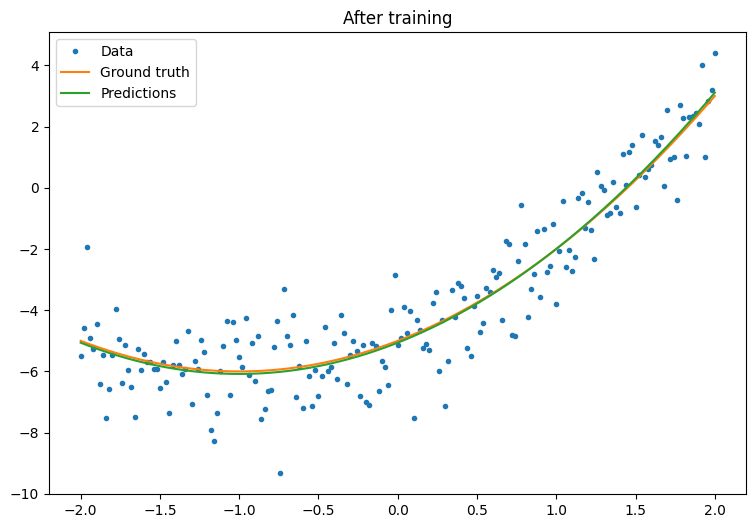

In [35]:
plot_preds(x, y, f, quad_model, 'After training')

잘 작동하지만 일반적인 훈련 유틸리티의 구현은 `tf.keras` 모듈에서 사용할 수 있다는 것을 명심해야 합니다. 따라서 직접 작성하기 전에 사용해보는 것이 좋습니다. 먼저 `Model.compile`와 `Model.fit` 메서드로 훈련 루프를 구현합니다.

`tf.keras.Sequential`을 사용하여 Keras의 순차 모델을 만드는 것으로 시작합니다. 가장 간단한 Keras 레이어 중 하나는 `tf.keras.layers.Dense`로 인스턴스화할 수 있는 덴스 레이어(dense layer)입니다. 덴스 레이어는 $\mathrm{Y} = \mathrm{W}\mathrm{X} + \vec{b}$ 형식의 다차원 선형 관계를 학습할 수 있습니다. $w_1x^2 + w_2x + b$ 형식의 비선형 방정식을 학습하려면 덴스 레이어의 입력은 $x^2$와 $x$를 특성으로 하는 데이터 행렬이어야 합니다. `tf.keras.layers.Lambda` 람다 레이어를 사용하여 이 스택 변환을 수행할 수 있습니다.

In [36]:
new_model = tf.keras.Sequential([
    tf.keras.layers.Lambda(lambda x: tf.stack([x, x**2], axis=1)),
    tf.keras.layers.Dense(units=1, kernel_initializer=tf.random.normal)])

In [37]:
new_model.compile(
    loss=tf.keras.losses.MSE,
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.01))

history = new_model.fit(x, y,
                        epochs=100,
                        batch_size=32,
                        verbose=0)

new_model.save('./my_new_model')

INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(2, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f08d04ae6a0>, 139675831163120), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f08d0455a00>, 139675831205440), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(2, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f08d04ae6a0>, 139675831163120), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f08d0455a00>, 139675831205440), {}).


INFO:tensorflow:Assets written to: ./my_new_model/assets


INFO:tensorflow:Assets written to: ./my_new_model/assets


훈련 후 Keras 모델의 성능을 관찰합니다.

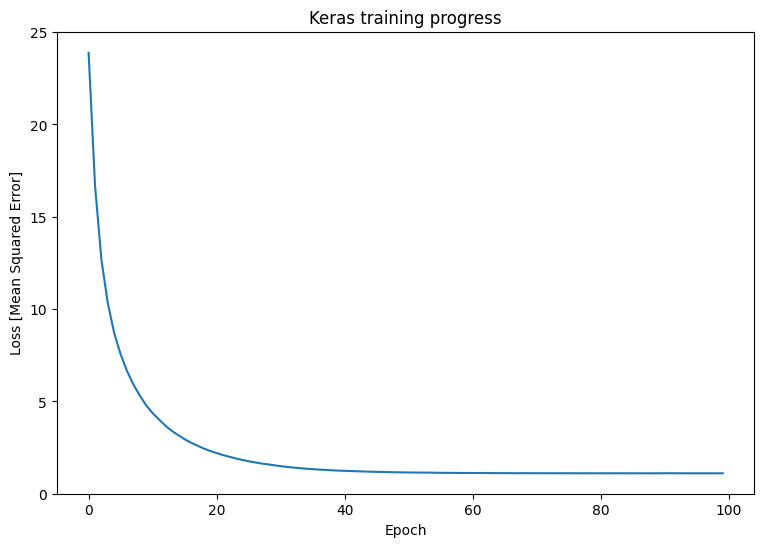

In [38]:
plt.plot(history.history['loss'])
plt.xlabel('Epoch')
plt.ylim([0, max(plt.ylim())])
plt.ylabel('Loss [Mean Squared Error]')
plt.title('Keras training progress');

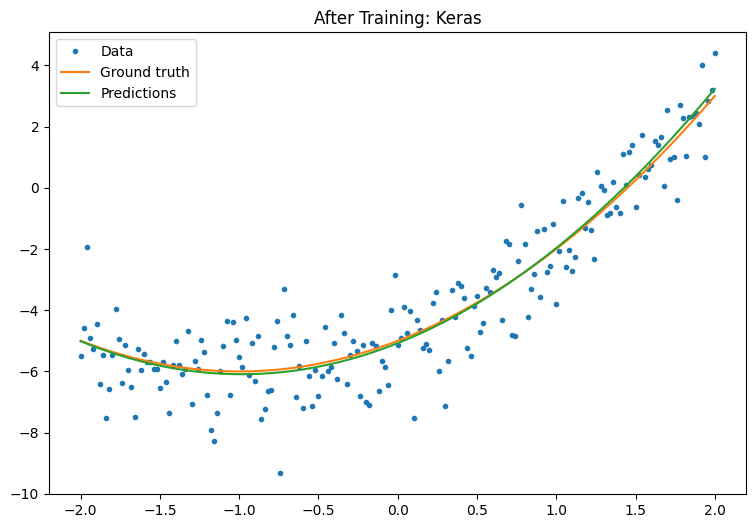

In [39]:
plot_preds(x, y, f, new_model, 'After Training: Keras')

자세한 내용은 [기본 훈련 루프](basic_training_loops.ipynb) 및 [Keras 가이드](https://www.tensorflow.org/guide/keras)를 참고하세요.